In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas
from torch.utils.data import DataLoader,Dataset, random_split, Subset
from matplotlib.pylab import plt
import warnings

from torchmetrics.classification import BinaryAccuracy
import os
import shutil
from util_FPC import EarlyStopping
from load_data_conventional import *
from dataloader_conventional import *
from train_model_conventional import *
from model_conventional import *


warnings.filterwarnings('ignore')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
discharge_capacities = np.load(r"./Datasets/discharge_capacity.npy", allow_pickle=True)
discharge_capacities = discharge_capacities.tolist()
percentage = 0.40

np.array(discharge_capacities[0]).shape

(7, 1851)

In [3]:
max_length_train,max_length_out = get_lengths(discharge_capacities,percentage)
max_length_out = max_length_out+1

Cell with Maximum length : 2
Maximum cycle length : 2236
Maximum Length for training X: 894
Maximum Length of output     : 1342


In [4]:

channels = [0,1,2,3,4,5,6]

Text(0, 0.5, 'Discharge Capacity')

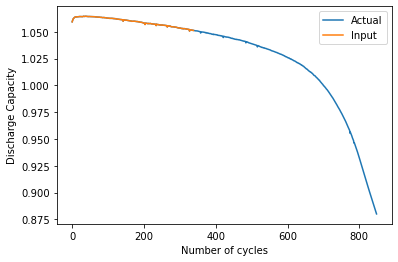

In [5]:
ind = 109

plt.plot(discharge_capacities[ind][0])
# plt.plot(X_train_padded[ind])
plt.plot(discharge_capacities[ind][0][0:int(0.4*len(discharge_capacities[ind][0]))])

# if(ind != cell_with_max_cycle_life):
#     plt.plot(np.pad(Y_train_padded[ind],(list(X_train_padded[ind][0]).index(-0.1),0),constant_values=(-1)))
    
# else:
#     plt.plot(np.pad(Y_train_padded[ind],(len(X_train_padded[ind][0]),0),constant_values=(-1)))

plt.legend(['Actual', 'Input', 'Output'])
# plt.title("Input and Output Data")
plt.xlabel("Number of cycles")
plt.ylabel("Discharge Capacity")

In [6]:
model = LSTM_Model_Conventional(max_length_train,len(channels))
ch = ''.join(map(str,channels))
dataset = "MIT"
version = 1
fld = 3

model_dir = "./Weights/Conventional/"
model_path = f'{model_dir}/{dataset}_{model.name}_Conventional_Channels={ch}_Version={version}_Fold{fld}.pth'
epochs = 50
load_pretrained = False
pretrained = False
lr = 0.001
n_folds = 5
parameters = {"epochs" : epochs,
                "learning_rate" : lr ,
                "percentage" : percentage,
                "max_length_train" :max_length_train,
                "max_length_out" :max_length_out,
                "channels" : channels
}

optimizer = torch.optim.Adam(model.parameters(), lr = lr, betas= (0.9, 0.99))
criterion = nn.MSELoss()
early_stopping_patiance = 25


if(pretrained):
    model.load_state_dict(torch.load(model_path,map_location= device))
else:
    if(load_pretrained):
       model.load_state_dict(torch.load(model_path,map_location= device))

       model= perform_n_folds_conventional(model, n_folds,discharge_capacities, criterion, 
                    optimizer, early_stopping_patiance, model_path,
                    parameters,version, dataset)
    else:
        model = perform_n_folds_conventional(model, n_folds,discharge_capacities, criterion, 
                    optimizer, early_stopping_patiance, model_path,
                    parameters,version, dataset)




*********************  Fold = 0  ********************* 


Epoch = 0, Train Loss = 0.19441347115713617, Val MSE = 0.10650476647747888, MAE = 0.23693147715595034, MAPE = 686.8940642674764
Epoch = 1, Train Loss = 0.06337190050145854, Val MSE = 0.09253969022797214, MAE = 0.21800654215945137, MAPE = 642.0414791636997
Epoch = 2, Train Loss = 0.052434284078038254, Val MSE = 0.09014163404289219, MAE = 0.21342083397838804, MAPE = 791.9618873927328
EarlyStopping counter: 1 out of 25
Epoch = 3, Train Loss = 0.05162336942942246, Val MSE = 0.08166494085970852, MAE = 0.19996269709534115, MAPE = 703.3101189070278
EarlyStopping counter: 2 out of 25
Epoch = 4, Train Loss = 0.049544406212542365, Val MSE = 0.07760061328816745, MAE = 0.19330964734156927, MAPE = 719.298418018553
EarlyStopping counter: 3 out of 25
Epoch = 5, Train Loss = 0.04787293063557666, Val MSE = 0.07270553180327018, MAE = 0.19242877927091387, MAPE = 646.0516000058916
EarlyStopping counter: 4 out of 25
Epoch = 6, Train Loss = 0.0412129

KeyboardInterrupt: 

In [ ]:
model = LSTM_Model_Conventional(max_length_train,len(channels))

fold = 0
model_dir = "./Weights/Conventional/"
model_path = f'{model_dir}/{dataset}_{model.name}_Conventional_Channels={ch}_Version={version}_Fold{fold}.pth'
model.load_state_dict(torch.load(model_path,map_location= device))


<All keys matched successfully>

In [ ]:
test_batteries_temp = np.load("Test_data/test_batteries_Conventional_MIT_LSTM_fold"+str(fold)+"_version" +str(version) +".npy",allow_pickle=True)
data_test_temp =  get_data_conventional(discharge_capacities, channels,test_batteries_temp,max_length_train, max_length_out,percentage)
obj_test_temp  = battery_dataloader_conventional(data_test_temp)
test_dataloader_temp = DataLoader(obj_test_temp, batch_size=1,shuffle=False)

_,_,_, outputs = test_model_conventional(model, criterion, test_dataloader_temp, True)



Test loss : MSE = 0.07960352826863527, MAE = 0.19563765317201615, MAPE = 645.5896360397339 




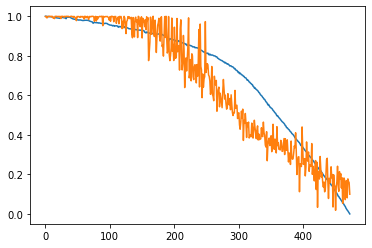

In [ ]:
plt.plot(outputs[3][0].detach().numpy())
plt.plot(outputs[3][1].detach().numpy())
